In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Library for feature scaling
from sklearn.preprocessing import RobustScaler


#Libraries for logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Libraries for evaluation
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
#Loading Dataset
titanic_df= pd.read_csv('titanic_dataset.csv')

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Looking at the first few rows in the dataset
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis

In [6]:
titanic_df.shape

(891, 12)

In [7]:
#Information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above, we see that the dataset is missing a lot of information for the Cabin column. We'll need to deal with that when we go about using **Cabin** column.
                                                                   
Other information seems to be complete, except some **Age** entries.

In [9]:
titanic_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
titanic_df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
titanic_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
titanic_df_numcol = titanic_df.select_dtypes(exclude=['object']).columns
titanic_df_num= titanic_df[titanic_df_numcol]

<Axes: >

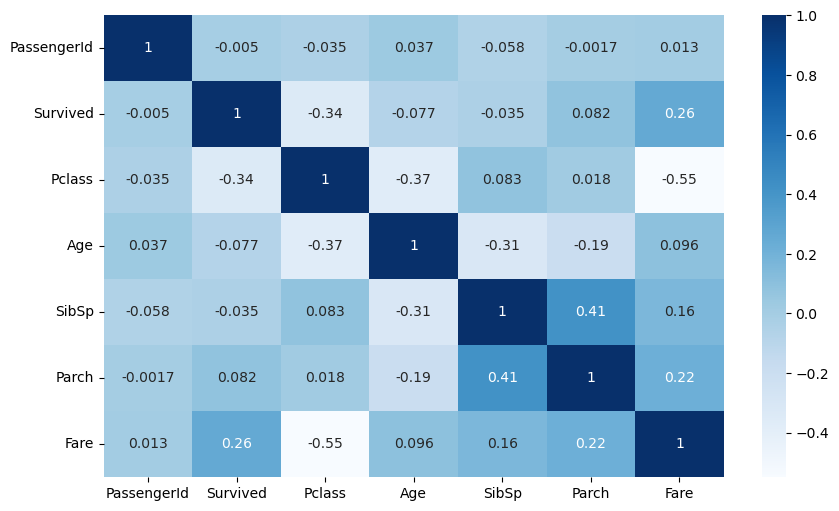

In [13]:
plt.figure(figsize =(10,6))
sns.heatmap(titanic_df_num.corr(), annot=True,cmap = 'Blues')

<Axes: xlabel='Survived', ylabel='count'>

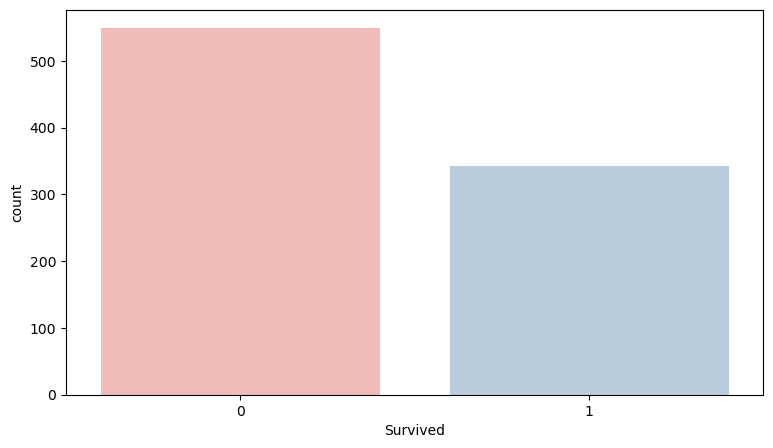

In [14]:
plt.figure(figsize =(9,5))
sns.countplot(x= 'Survived',data=titanic_df,palette='Pastel1')

From above plot it is clear that number of persons Survived is lesss than Demise

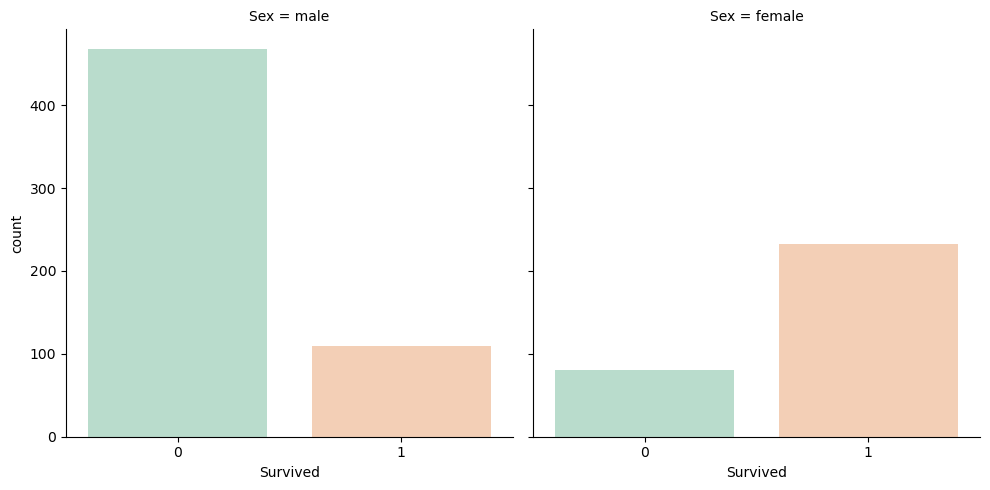

In [15]:
sns.catplot(x ="Survived", col ='Sex', kind ="count", data = titanic_df, palette = 'Pastel2')

From above plot we see that Male didn't survived as compare to Female

<Figure size 900x400 with 0 Axes>

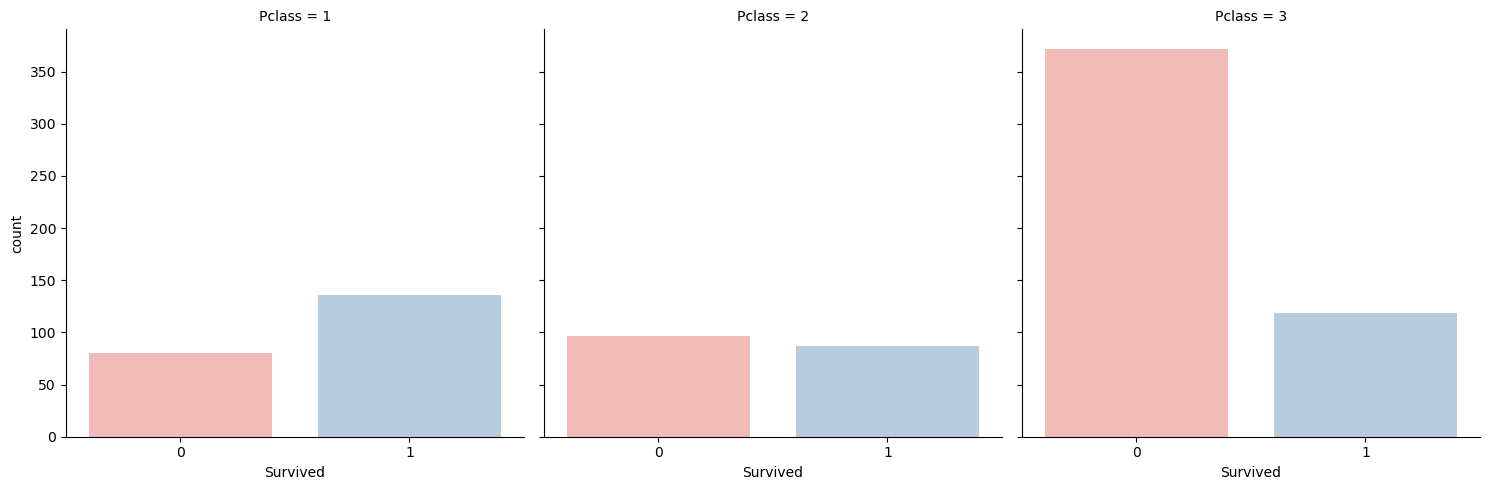

In [16]:
plt.figure(figsize = (9,4))
sns.catplot(data = titanic_df, x= 'Survived',col ='Pclass',kind='count',palette ='Pastel1')
plt.show()

Above plot we can see that persons from PClass3 did not survived as compare to PClass2 and PClass1

<Figure size 900x400 with 0 Axes>

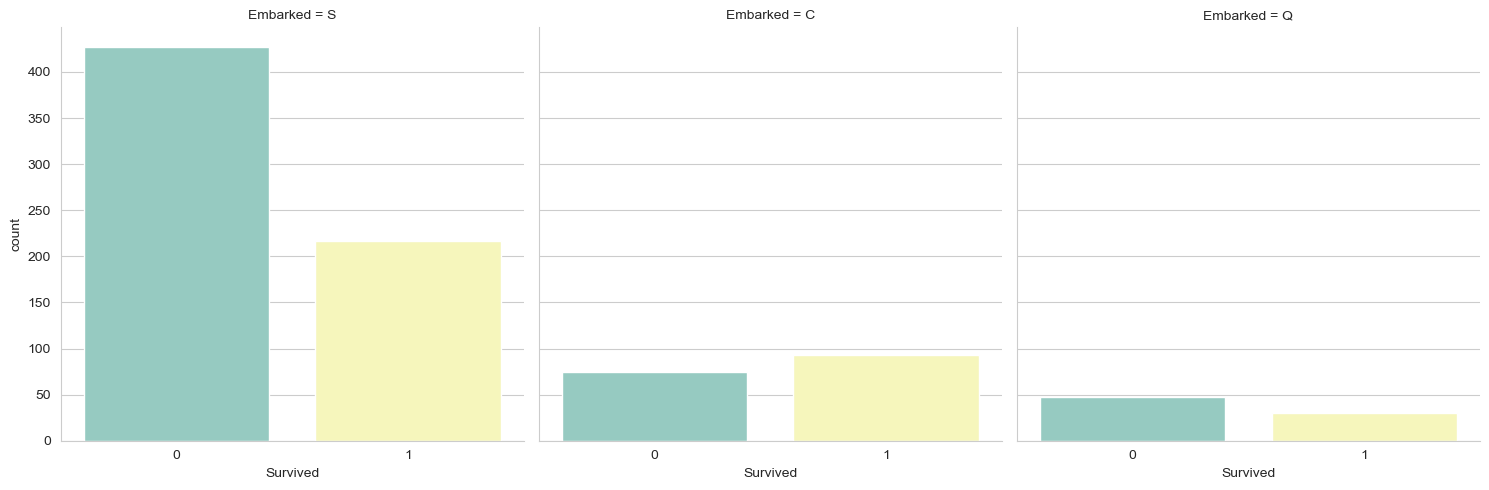

In [17]:
plt.figure(figsize=(9,4))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked',kind='count',data=titanic_df,palette ='Set3')

From above plot we can see that majority of people from Embarked-S died as compare Embarked-C and Embarked-Q

Above we have seen that number of people in PClass3 died more. So lets check is there any relation between **Embarked** and **Pclass**

<Figure size 900x400 with 0 Axes>

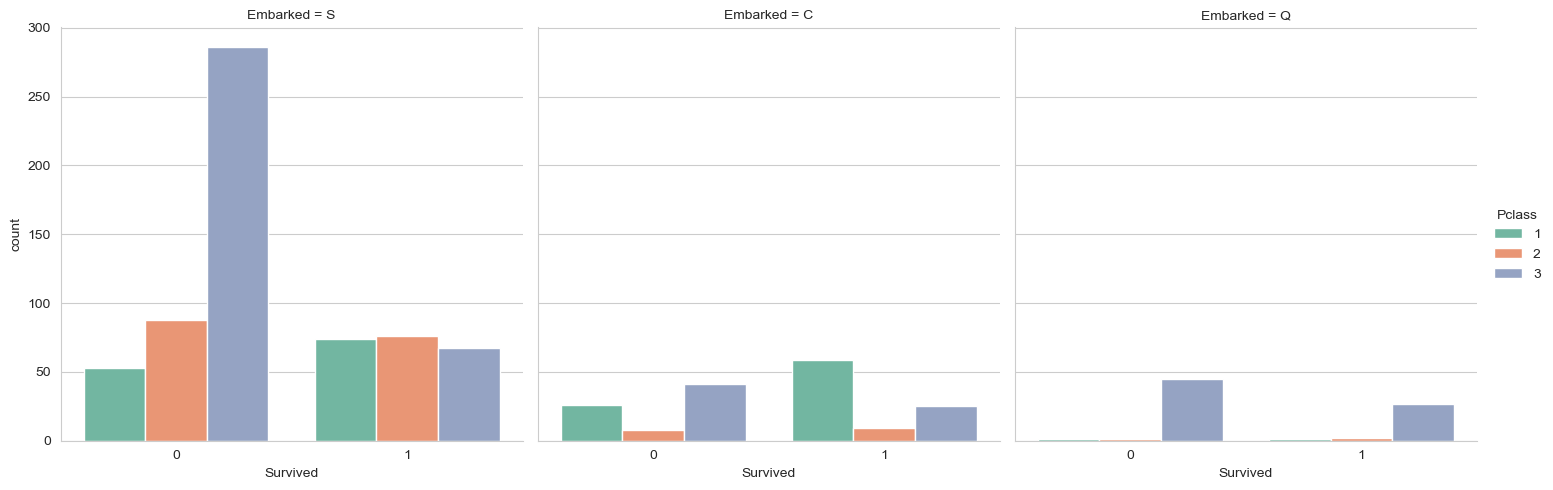

In [18]:
plt.figure(figsize=(9,4))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked',hue='Pclass',kind='count',data=titanic_df,palette ='Set2')

Majority of people died from **Embarked-S** was in **PClass3**.

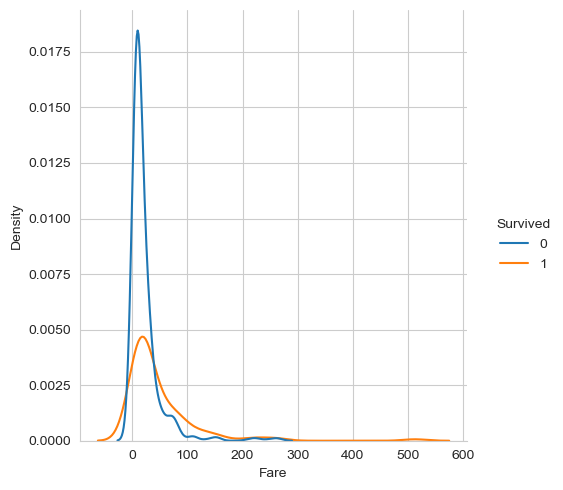

In [19]:
sns.displot(data=titanic_df, x="Fare",hue='Survived',kind ='kde')

Here we see that number of persons survived those who bought ticket of high fare.

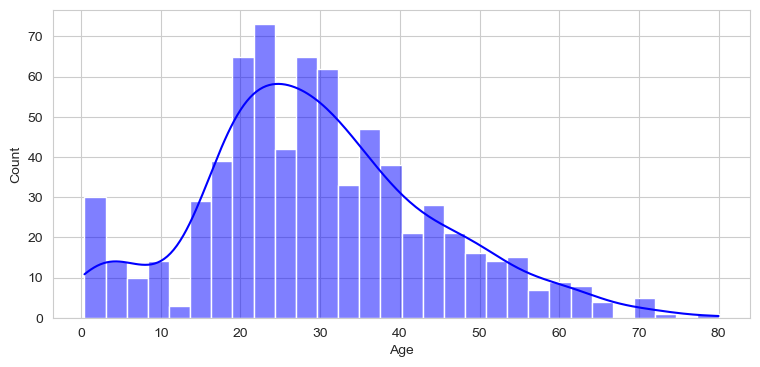

In [20]:
plt.figure(figsize = (9,4))
sns.histplot(titanic_df['Age'].dropna(),kde =True, color='blue',bins =30)
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

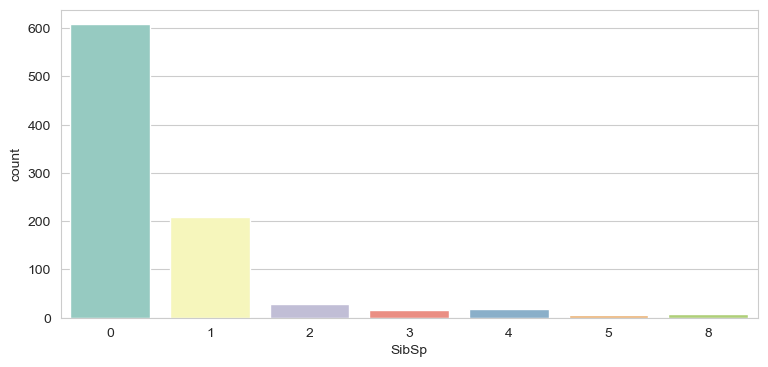

In [21]:
plt.figure(figsize=(9,4))
sns.countplot(x='SibSp',data = titanic_df,palette ='Set3')

Above we can see that most of the people does not have Sibling or Spouse.

<Axes: xlabel='Parch', ylabel='count'>

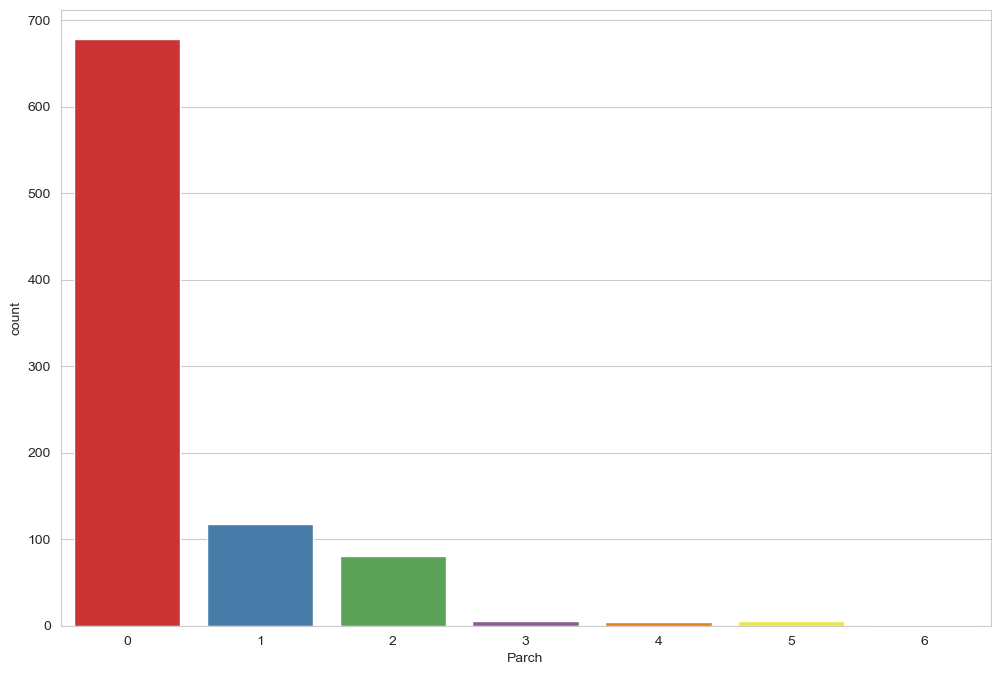

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='Parch',data = titanic_df,palette ='Set1')

Here we can clearly see that most of the people does not have children accompanying them.

## Data Preprocessing

In [23]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that Age, Cabin, Embarked have missing values.

Lets hand missing values of Age columns

<Axes: >

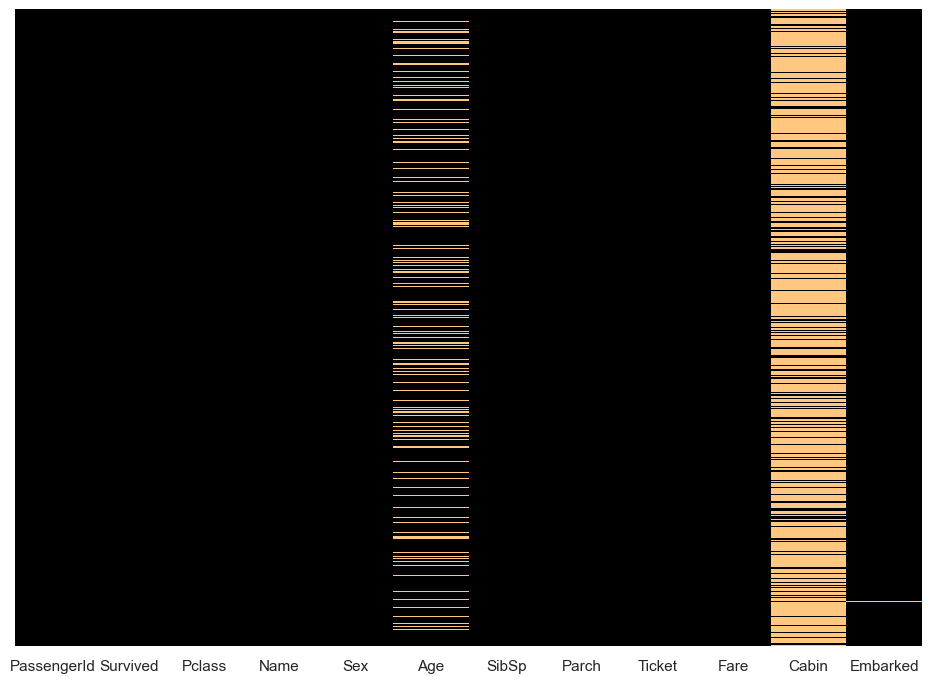

In [24]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(titanic_df.isnull(),yticklabels= False, cbar=False, cmap='copper')

Text(0.5, 1.0, 'Age over Pclass')

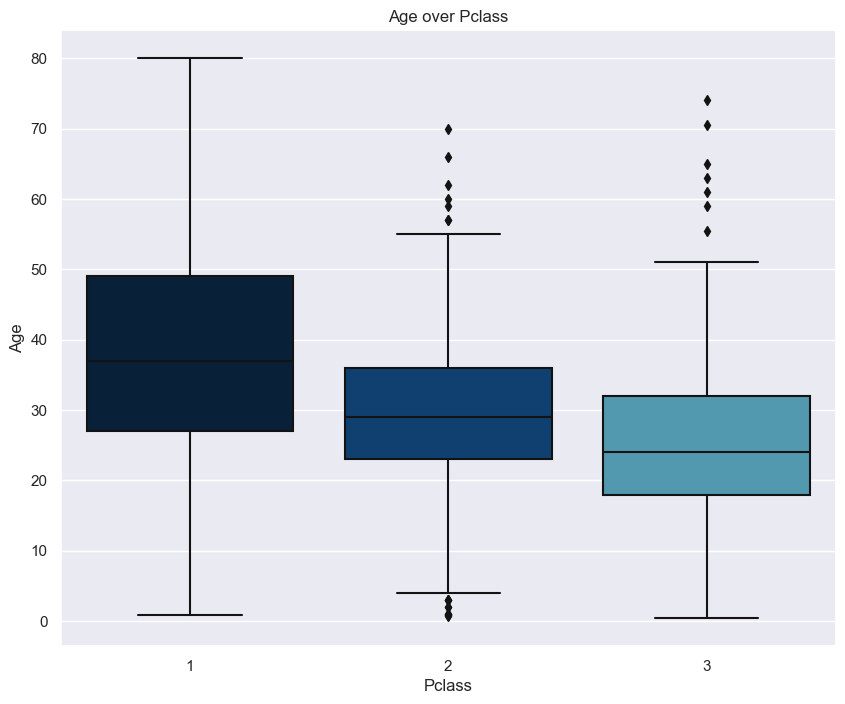

In [25]:
plt.figure(figsize =(10,8))
sns.boxplot(x= 'Pclass', y = 'Age', data= titanic_df, palette ='ocean')
plt.title('Age over Pclass')

In [26]:
def imputing_missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(imputing_missing_age,axis=1)

In [28]:
titanic_df['Age'].isnull().sum()

0

In [29]:
titanic_df['Cabin'].isnull().sum()

687

In Cabin column we have 687 null values out of 891 values, count of null values is greater than 75%. So we can drop this column

In [30]:
#Dropping Cabin column
titanic_df.drop('Cabin',axis = 1, inplace = True)

In [31]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


Cabin column has been removed.

In [32]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Here we see that only 2 rows of Embarked is missing, so we can drop those two rows.

In [33]:
titanic_df.dropna(inplace=True)

In [34]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So we have done with missing values.

In [35]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now, there are only 4 categorical variable named : Name, Sex, Ticket, Embarked.

Features named Name and Ticket will have no significant meaning for determining target,so we can drop those two features. 

Where as Sex and Embarked features will have to be encoded for further analysis.

In [36]:
titanic_df.drop(['Name','Ticket'],axis= 1, inplace = True)

In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Now lets convert categorical variable to numeric values.

In [38]:
#Encoding Categorical variables

titanic_df['Sex']= titanic_df['Sex'].map({'female':0, 'male':1})
titanic_df['Embarked']= titanic_df['Embarked'].map({'S':0, 'C':1, 'Q':3})


I have done mapping for converting it to numeric as there were only two variables in Sex and 3 in Embarked 

In [39]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


Here Feature named PassengerId is like index, it does not have any significance for building model and will loose its meaning as index when we do feature scaling. So it can be dropped.

In [40]:
titanic_df.drop('PassengerId',axis= 1, inplace = True)

In [41]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [42]:
#Feature selection 
X= titanic_df.drop(['Survived'],axis= 1)

#Target variable
y = titanic_df['Survived']

In [43]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train-Test Split

In [45]:
#Splitting the dataset into training and testing sets to evaluate the model's performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)

(711, 7)
(178, 7)


In [47]:
print(y_train.shape)
print(y_test.shape)

(711,)
(178,)


## Feature Scaling

In [48]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

## Logistic Regression Model

In [49]:
model= LogisticRegression(max_iter=100)
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

## Evaluation

In [51]:
#Checking accuracy 

accuracy = accuracy_score(y_test,y_pred)
print(f' Accuracy is : {accuracy:.2f}')

 Accuracy is : 0.81


In [52]:
#Confusion martix
confusion_mart= confusion_matrix(y_test,y_pred)
confusion_mart

array([[91, 18],
       [15, 54]], dtype=int64)

In [53]:
#Classfication report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

